In [77]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import sklearn
import geopandas as gpd
import numpy as np
from pandas.errors import ParserError


In [78]:
def getDataSet():
    try:
        rain = pd.read_csv('rainstorm9804_2208.csv')
    except ParserError as error:
        print(error)
    return rain

In [79]:
df = getDataSet()
df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   color       721 non-null    object
 1   start time  721 non-null    object
 2   start date  721 non-null    object
 3   end time    721 non-null    object
 4   end date    721 non-null    object
 5   duration    721 non-null    object
dtypes: object(6)
memory usage: 33.9+ KB


In [80]:
df.isna().sum()

color         0
start time    0
start date    0
end time      0
end date      0
duration      0
dtype: int64

In [81]:
df.head()

,color,start time,start date,end time,end date,duration
0,Amber,5:15,12-Apr-98,8:00,12-Apr-98,02 45
1,Amber,21:15,26-Apr-98,21:50,26-Apr-98,00 35
2,Red,21:50,26-Apr-98,4:00,27-Apr-98,06 10
3,Amber,4:00,27-Apr-98,5:45,27-Apr-98,01 45
4,Amber,16:20,2-May-98,17:50,2-May-98,01 30


In [82]:
df['duration']

0      02 45
1      00 35
2      06 10
3      01 45
4      01 30
       ...  
716    01 15
717    02 10
718    01 20
719    02 00
720    01 30
Name: duration, Length: 721, dtype: object

In [83]:
start_d = df['start date'].str.split('-')

In [84]:
start_d[0]

['12', 'Apr', '98']

In [85]:
df['s_day'] = start_d.str.get(0)

In [86]:
df['s_month'] = start_d.str.get(1)

In [87]:
df['s_year'] = start_d.str.get(2)

In [88]:
end_date = df['end date'].str.split('-')

In [89]:
end_date

0      [12, Apr, 98]
1      [26, Apr, 98]
2      [27, Apr, 98]
3      [27, Apr, 98]
4       [2, May, 98]
           ...      
716    [14, Jun, 22]
717    [15, Jun, 22]
718     [1, Jul, 22]
719     [1, Jul, 22]
720    [30, Jul, 22]
Name: end date, Length: 721, dtype: object

In [90]:
df['e_d'] = end_date.str.get(0)

In [91]:
df['e_month'] = end_date.str.get(1)

In [92]:
df['e_year'] = end_date.str.get(2)

In [93]:
df.head(10)

,color,start time,start date,end time,end date,duration,s_day,s_month,s_year,e_d,e_month,e_year
0,Amber,5:15,12-Apr-98,8:00,12-Apr-98,02 45,12,Apr,98,12,Apr,98
1,Amber,21:15,26-Apr-98,21:50,26-Apr-98,00 35,26,Apr,98,26,Apr,98
2,Red,21:50,26-Apr-98,4:00,27-Apr-98,06 10,26,Apr,98,27,Apr,98
3,Amber,4:00,27-Apr-98,5:45,27-Apr-98,01 45,27,Apr,98,27,Apr,98
4,Amber,16:20,2-May-98,17:50,2-May-98,01 30,2,May,98,2,May,98
5,Red,17:50,2-May-98,20:00,2-May-98,02 10,2,May,98,2,May,98
6,Amber,8:40,15-May-98,13:10,15-May-98,04 30,15,May,98,15,May,98
7,Amber,8:15,24-May-98,12:45,24-May-98,04 30,24,May,98,24,May,98
8,Red,12:45,24-May-98,15:45,24-May-98,03 00,24,May,98,24,May,98
9,Amber,5:00,4-Jun-98,8:15,4-Jun-98,03 15,4,Jun,98,4,Jun,98


In [94]:
df.drop('end date', axis=1, inplace=True)

In [95]:
df.head()

,color,start time,start date,end time,duration,s_day,s_month,s_year,e_d,e_month,e_year
0,Amber,5:15,12-Apr-98,8:00,02 45,12,Apr,98,12,Apr,98
1,Amber,21:15,26-Apr-98,21:50,00 35,26,Apr,98,26,Apr,98
2,Red,21:50,26-Apr-98,4:00,06 10,26,Apr,98,27,Apr,98
3,Amber,4:00,27-Apr-98,5:45,01 45,27,Apr,98,27,Apr,98
4,Amber,16:20,2-May-98,17:50,01 30,2,May,98,2,May,98


In [96]:
df['year'] = df['e_year']

In [97]:
df.head()

,color,start time,start date,end time,duration,s_day,s_month,s_year,e_d,e_month,e_year,year
0,Amber,5:15,12-Apr-98,8:00,02 45,12,Apr,98,12,Apr,98,98
1,Amber,21:15,26-Apr-98,21:50,00 35,26,Apr,98,26,Apr,98,98
2,Red,21:50,26-Apr-98,4:00,06 10,26,Apr,98,27,Apr,98,98
3,Amber,4:00,27-Apr-98,5:45,01 45,27,Apr,98,27,Apr,98,98
4,Amber,16:20,2-May-98,17:50,01 30,2,May,98,2,May,98,98


In [98]:
list = ['e_year', 's_year']

In [99]:
df.drop(list, axis=1, inplace=True)

In [100]:
df.head()

,color,start time,start date,end time,duration,s_day,s_month,e_d,e_month,year
0,Amber,5:15,12-Apr-98,8:00,02 45,12,Apr,12,Apr,98
1,Amber,21:15,26-Apr-98,21:50,00 35,26,Apr,26,Apr,98
2,Red,21:50,26-Apr-98,4:00,06 10,26,Apr,27,Apr,98
3,Amber,4:00,27-Apr-98,5:45,01 45,27,Apr,27,Apr,98
4,Amber,16:20,2-May-98,17:50,01 30,2,May,2,May,98


In [101]:
val1 = [items for items in df['s_day']]

In [102]:
val2 = [items for items in df['e_d']]

In [103]:
def compareDaysoftheMonth():
    if val1 == val2:
        return 'List Values are the same'
    else:
        return 'List values are not the same'

In [104]:
compareDaysoftheMonth()

'List values are not the same'

In [124]:
df.head(10)

,color,start time,start date,end time,duration,s_day,s_month,e_d,e_month,year
0,Amber,2022-08-03 05:15:00,12-Apr-98,8:00,02 45,12,Apr,12,Apr,98
1,Amber,2022-08-03 21:15:00,26-Apr-98,21:50,00 35,26,Apr,26,Apr,98
2,Red,2022-08-03 21:50:00,26-Apr-98,4:00,06 10,26,Apr,27,Apr,98
3,Amber,2022-08-03 04:00:00,27-Apr-98,5:45,01 45,27,Apr,27,Apr,98
4,Amber,2022-08-03 16:20:00,2-May-98,17:50,01 30,2,May,2,May,98
5,Red,2022-08-03 17:50:00,2-May-98,20:00,02 10,2,May,2,May,98
6,Amber,2022-08-03 08:40:00,15-May-98,13:10,04 30,15,May,15,May,98
7,Amber,2022-08-03 08:15:00,24-May-98,12:45,04 30,24,May,24,May,98
8,Red,2022-08-03 12:45:00,24-May-98,15:45,03 00,24,May,24,May,98
9,Amber,2022-08-03 05:00:00,4-Jun-98,8:15,03 15,4,Jun,4,Jun,98


In [106]:
from datetime import time

In [107]:
df['start time'] = pd.to_datetime(df['start time'])

In [108]:
df.head(10)

,color,start time,start date,end time,duration,s_day,s_month,e_d,e_month,year
0,Amber,2022-08-03 05:15:00,12-Apr-98,8:00,02 45,12,Apr,12,Apr,98
1,Amber,2022-08-03 21:15:00,26-Apr-98,21:50,00 35,26,Apr,26,Apr,98
2,Red,2022-08-03 21:50:00,26-Apr-98,4:00,06 10,26,Apr,27,Apr,98
3,Amber,2022-08-03 04:00:00,27-Apr-98,5:45,01 45,27,Apr,27,Apr,98
4,Amber,2022-08-03 16:20:00,2-May-98,17:50,01 30,2,May,2,May,98
5,Red,2022-08-03 17:50:00,2-May-98,20:00,02 10,2,May,2,May,98
6,Amber,2022-08-03 08:40:00,15-May-98,13:10,04 30,15,May,15,May,98
7,Amber,2022-08-03 08:15:00,24-May-98,12:45,04 30,24,May,24,May,98
8,Red,2022-08-03 12:45:00,24-May-98,15:45,03 00,24,May,24,May,98
9,Amber,2022-08-03 05:00:00,4-Jun-98,8:15,03 15,4,Jun,4,Jun,98


In [109]:
df['start time'] = df['start time'].astype(str)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   color       721 non-null    object
 1   start time  721 non-null    object
 2   start date  721 non-null    object
 3   end time    721 non-null    object
 4   duration    721 non-null    object
 5   s_day       721 non-null    object
 6   s_month     721 non-null    object
 7   e_d         721 non-null    object
 8   e_month     721 non-null    object
 9   year        721 non-null    object
dtypes: object(10)
memory usage: 56.5+ KB


In [128]:
#Get the difference in days
df['s_day'] = df['s_day'].astype(int)

In [129]:
df['e_d'] = df['e_d'].astype(int)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   color       721 non-null    object
 1   start time  721 non-null    object
 2   start date  721 non-null    object
 3   end time    721 non-null    object
 4   duration    721 non-null    object
 5   s_day       721 non-null    int64 
 6   s_month     721 non-null    object
 7   e_d         721 non-null    int64 
 8   e_month     721 non-null    object
 9   year        721 non-null    object
dtypes: int64(2), object(8)
memory usage: 56.5+ KB


In [131]:
df['duration_days'] = df['e_d'] - df['s_day']

In [132]:
df.head(10)

,color,start time,start date,end time,duration,s_day,s_month,e_d,e_month,year,duration_days
0,Amber,2022-08-03 05:15:00,12-Apr-98,8:00,02 45,12,Apr,12,Apr,98,0
1,Amber,2022-08-03 21:15:00,26-Apr-98,21:50,00 35,26,Apr,26,Apr,98,0
2,Red,2022-08-03 21:50:00,26-Apr-98,4:00,06 10,26,Apr,27,Apr,98,1
3,Amber,2022-08-03 04:00:00,27-Apr-98,5:45,01 45,27,Apr,27,Apr,98,0
4,Amber,2022-08-03 16:20:00,2-May-98,17:50,01 30,2,May,2,May,98,0
5,Red,2022-08-03 17:50:00,2-May-98,20:00,02 10,2,May,2,May,98,0
6,Amber,2022-08-03 08:40:00,15-May-98,13:10,04 30,15,May,15,May,98,0
7,Amber,2022-08-03 08:15:00,24-May-98,12:45,04 30,24,May,24,May,98,0
8,Red,2022-08-03 12:45:00,24-May-98,15:45,03 00,24,May,24,May,98,0
9,Amber,2022-08-03 05:00:00,4-Jun-98,8:15,03 15,4,Jun,4,Jun,98,0


In [159]:
#Rain fall in days for the years in view
rain_fall_per_year = df.groupby('year').sum()['duration_days']
rain_fall_per_year = rain_fall_per_year.reset_index()
sb.set_theme()

<AxesSubplot:xlabel='year', ylabel='duration_days'>

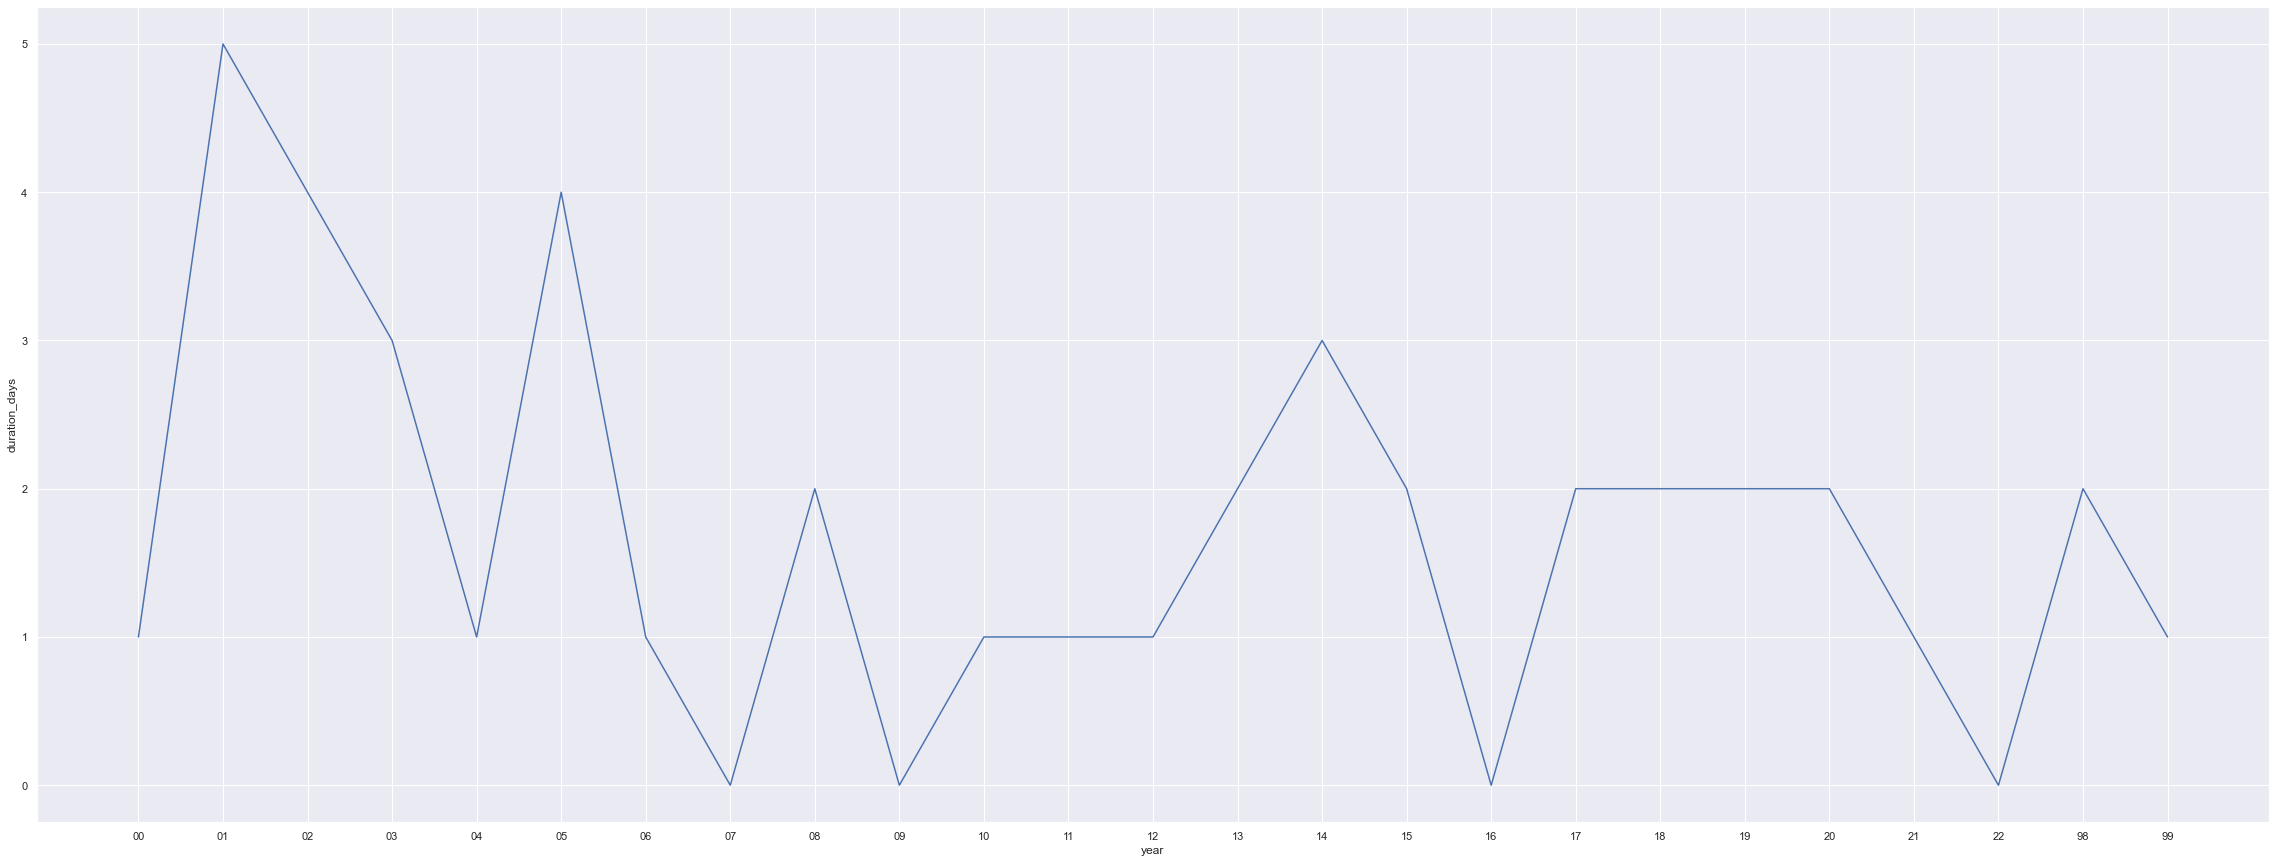

In [152]:
plt.figure(figsize=(40,15))
sb.lineplot(x='year', y='duration_days',data =rain_fall_per_year )

In [160]:
test = df.groupby(by=['e_month','year']).agg(total_days=('duration_days','sum'))
test.reset_index()

,e_month,year,total_days
0,Apr,00,1
1,Apr,01,0
2,Apr,03,1
3,Apr,04,0
4,Apr,06,0
...,...,...,...
148,Sep,18,0
149,Sep,19,0
150,Sep,20,0
151,Sep,98,0


<Figure size 2160x1800 with 0 Axes>

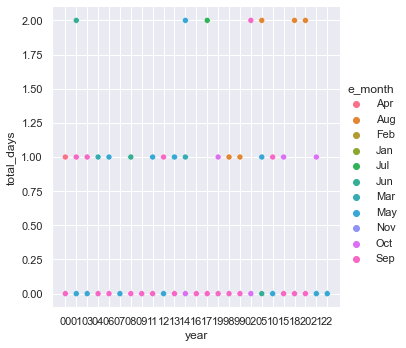

In [164]:

plt.figure(figsize=(30,25))
sb.relplot(x='year', y='total_days', hue='e_month', data=test)